# Clustering Articles: Introduction

This project aims to use the course studied clustering models that have been presented. <br/>
The used dataset is articles dataset which consists of the following:
1. Business Dataset: 2000 articles
2. Education Dataset: 2000 articles
3. Entertainment Dataset: 2000 article
4. Sports Dataset: 2000 article
5. Technology Dataset: 2000 article

These datasets add up to 10,000 articles that we can divided using stratified random sampling to create a smaller dataset consisting of a thousand article.
<br/>
We will use the following clustering models to test them on the datasets:
1. K-means
2. AgglomerativeClustering
3. DBSCAN
4. SpectralClustering

# Data Importing

In this section, we import the data and create two datasets `large and small`.

In [1]:
#Importing needed libraries
import pandas as pd

In [2]:
# load the files
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/business_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/education_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/entertainment_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/sports_data.csv";
!wget "https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/technology_data.csv";

--2024-05-20 17:41:11--  https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/business_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4104876 (3.9M) [text/plain]
Saving to: ‘business_data.csv’

business_data.csv   100%[===================>]   3.91M  --.-KB/s    in 0.06s   

2024-05-20 17:41:12 (60.5 MB/s) - ‘business_data.csv’ saved [4104876/4104876]

--2024-05-20 17:41:12--  https://raw.githubusercontent.com/mohammedradman1/Data_analytics/main/Clustering%20Dataset/education_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

In [3]:
# Reading dataset files
business_df = pd.read_csv("business_data.csv")
education_df = pd.read_csv("education_data.csv")
entertainment_df = pd.read_csv("entertainment_data.csv")
sports_df = pd.read_csv("sports_data.csv")
technology_df = pd.read_csv("technology_data.csv")

we want to create two datasets of the five clusters.

In [4]:
# We create a small dataset
df_small = pd.concat([business_df.sample(100), education_df.sample(100),
                      entertainment_df.sample(100), sports_df.sample(100),
                      technology_df.sample(100)])
df_small.reset_index(inplace=True) # resetting index
df_small.head(3)

,index,headlines,description,content,url,category
0,1734,IDFC Bank looks to raise Rs 20 billion in fisc...,The public issue will conclude on July 28 and ...,Yatharth Hospital & Trauma Care Ltd has set a ...,https://indianexpress.com/article/business/mar...,business
1,1363,"Moody’s affirms India’s sovereign ratings, ret...",Moody's Investors Service has affirmed India's...,Moody’s Investors Service has affirmed India’s...,https://indianexpress.com/article/business/eco...,business
2,1823,"Swiggy acquires LYNK Logistics, to enter retai...",Total income during the quarter under review i...,Federal Bank on Thursday reported 29 per cent ...,https://indianexpress.com/article/business/com...,business


In [5]:
# Creating the large dataset
df_big = pd.concat([business_df, education_df,
                      entertainment_df, sports_df,
                      technology_df])
df_big.reset_index(inplace=True) # resetting index
df_big.head(3)

,index,headlines,description,content,url,category
0,0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


# Data Exploration

We notice that the data is already clustered and labelled. However, we will remove the label and only cluster the articles using only two columns which are:
  1. Description Column.
  2. Content Column. <br/>

In the following, we will explore the data visually to inspect it and get an understanding of it.

In [6]:
# Print the count of the different labels
import matplotlib.pyplot as plt

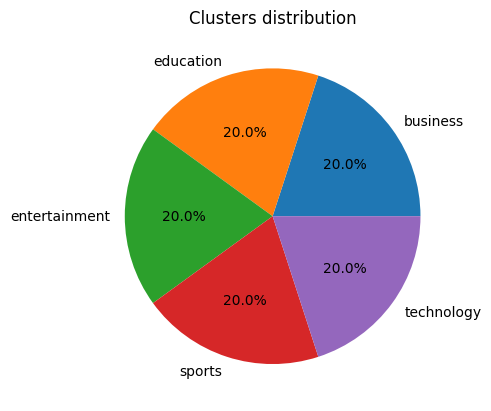

In [7]:
# Plotting the disrtributions of each class
values = df_big['category'].value_counts();
categories = df_big['category'].unique();

plt.pie(values, labels = categories, autopct='%1.1f%%')
plt.title("Clusters distribution")
plt.show()

(array([2000.,    0., 2000.,    0.,    0., 2000.,    0., 2000.,    0.,
        2000.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

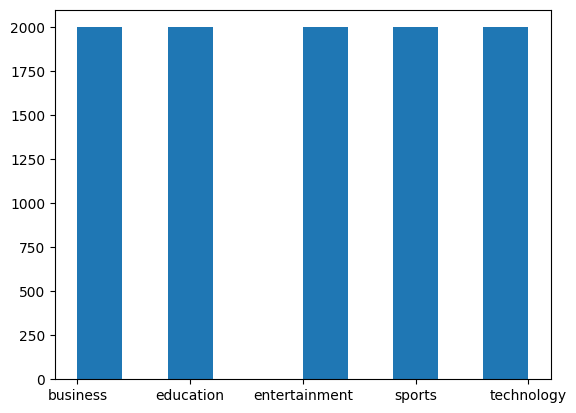

In [8]:
# plotting the distribution of the dataset labels
plt.hist(df_big["category"])

# Data Preprocessing

In this section, we preprocess the data to prepare it to be fed into the clustering models. We will perform the following:
1. Remove stop words.
2. Vectorize the data (feature extraction).


In [9]:
# Creating a copy of the data of the two used tables
small_df_copy = df_small[["headlines","description","content","category"]]
small_df_copy.head(3)

,headlines,description,content,category
0,IDFC Bank looks to raise Rs 20 billion in fisc...,The public issue will conclude on July 28 and ...,Yatharth Hospital & Trauma Care Ltd has set a ...,business
1,"Moody’s affirms India’s sovereign ratings, ret...",Moody's Investors Service has affirmed India's...,Moody’s Investors Service has affirmed India’s...,business
2,"Swiggy acquires LYNK Logistics, to enter retai...",Total income during the quarter under review i...,Federal Bank on Thursday reported 29 per cent ...,business


In [10]:
# creating a copy of the large dataset
big_df_copy = df_big[["headlines","description","content","category" ]]
big_df_copy.head(3)

,headlines,description,content,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,business


In [11]:
# applying lowercase to each column in the dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].str.lower()

<ipython-input-11-112cbb3d17fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].str.lower()


In [12]:
# verify conversion to small
small_df_copy.head(3)

,headlines,description,content,category
0,idfc bank looks to raise rs 20 billion in fisc...,the public issue will conclude on july 28 and ...,yatharth hospital & trauma care ltd has set a ...,business
1,"moody’s affirms india’s sovereign ratings, ret...",moody's investors service has affirmed india's...,moody’s investors service has affirmed india’s...,business
2,"swiggy acquires lynk logistics, to enter retai...",total income during the quarter under review i...,federal bank on thursday reported 29 per cent ...,business


In [13]:
# Converting big dataset to lowercase
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(str.lower)

big_df_copy.head(3)

<ipython-input-13-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(str.lower)
<ipython-input-13-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(str.lower)
<ipython-input-13-fe484a7cfd52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,headlines,description,content,category
0,nirmala sitharaman to equal morarji desai’s re...,with the presentation of the interim budget on...,"sitharaman, the first full-time woman finance ...",business
1,"‘will densify network, want to be at least no....","'in terms of market share, we aim to double it...",the merger of tata group’s budget airlines air...,business
2,air india group to induct an aircraft every si...,air india currently has 117 operational aircra...,the air india group plans to induct one aircra...,business


## Stopwords removal

In [14]:
# import the stopwords corpus
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Defining the language of the stop words
stop_words = stopwords.words("english")

In [16]:
# removing stop words
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stop_words] )

In [17]:
# Remove stopwords from small dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords)

small_df_copy.head(3)

<ipython-input-17-96ecdf122a75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords)
<ipython-input-17-96ecdf122a75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(remove_stopwords)
<ipython-input-17-96ecdf122a75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,headlines,description,content,category
0,idfc bank looks raise rs 20 billion fiscal 202...,public issue conclude july 28 bidding anchor i...,yatharth hospital & trauma care ltd set price ...,business
1,"moody’s affirms india’s sovereign ratings, ret...",moody's investors service affirmed india's lon...,moody’s investors service affirmed india’s lon...,business
2,"swiggy acquires lynk logistics, enter retail d...","total income quarter review increased rs 5,757...",federal bank thursday reported 29 per cent ris...,business


In [18]:
# Remove stopwords from big dataset
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)

big_df_copy.head(3)

<ipython-input-18-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)
<ipython-input-18-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(remove_stopwords)
<ipython-input-18-4bf43434803d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,headlines,description,content,category
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini...",business
1,"‘will densify network, want least no. 2 city p...","'in terms market share, aim double 2028 segmen...",merger tata group’s budget airlines air india ...,business
2,air india group induct aircraft every six days...,air india currently 117 operational aircraft f...,air india group plans induct one aircraft ever...,business


## Lemmatizating Text

In this part we perform lemmatizing.

In [19]:
# We download the package
!pip install nltk
!python -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
# Import necessary libraries: get wordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [21]:
# Define a lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
# Define a function to lemmatize the data
def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [23]:
# Applying lemmatization for small dataset
# Remove stopwords from small dataset
for column in small_df_copy.columns:
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)

small_df_copy.head(3)

<ipython-input-23-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)
<ipython-input-23-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy[column] = small_df_copy[column].apply(lemmatize_text)
<ipython-input-23-7cbcdb8662df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,headlines,description,content,category
0,idfc bank look raise r 20 billion fiscal 2024:...,public issue conclude july 28 bidding anchor i...,yatharth hospital & trauma care ltd set price ...,business
1,"moody’s affirms india’s sovereign ratings, ret...",moody's investor service affirmed india's long...,moody’s investor service affirmed india’s long...,business
2,"swiggy acquires lynk logistics, enter retail d...","total income quarter review increased r 5,757 ...",federal bank thursday reported 29 per cent ris...,business


In [24]:
# Applying lemmatization for big dataset
# Remove stopwords from big dataset
for column in big_df_copy.columns:
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)

big_df_copy.head(3)

<ipython-input-24-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)
<ipython-input-24-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy[column] = big_df_copy[column].apply(lemmatize_text)
<ipython-input-24-f9158237283c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,headlines,description,content,category
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini...",business
1,"‘will densify network, want least no. 2 city p...","'in term market share, aim double 2028 segment...",merger tata group’s budget airline air india e...,business
2,air india group induct aircraft every six day ...,air india currently 117 operational aircraft f...,air india group plan induct one aircraft every...,business


## Feature Extraction (Text Vectorization)

### Combining columns

We combine the three columns together

In [25]:
# combining columns in small dataset
small_df_copy["combined_text"] = small_df_copy["headlines"] +" "+ small_df_copy["description"]+" "+small_df_copy["content"]
# combining columns in big dataset
big_df_copy["combined_text"] = big_df_copy["headlines"] +" "+ big_df_copy["description"]+" "+ big_df_copy["content"]


<ipython-input-25-3032fd1ea570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_copy["combined_text"] = small_df_copy["headlines"] +" "+ small_df_copy["description"]+" "+small_df_copy["content"]
<ipython-input-25-3032fd1ea570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_copy["combined_text"] = big_df_copy["headlines"] +" "+ big_df_copy["description"]+" "+ big_df_copy["content"]


In [26]:
# check for combining process
small_df_copy.head(3)

,headlines,description,content,category,combined_text
0,idfc bank look raise r 20 billion fiscal 2024:...,public issue conclude july 28 bidding anchor i...,yatharth hospital & trauma care ltd set price ...,business,idfc bank look raise r 20 billion fiscal 2024:...
1,"moody’s affirms india’s sovereign ratings, ret...",moody's investor service affirmed india's long...,moody’s investor service affirmed india’s long...,business,"moody’s affirms india’s sovereign ratings, ret..."
2,"swiggy acquires lynk logistics, enter retail d...","total income quarter review increased r 5,757 ...",federal bank thursday reported 29 per cent ris...,business,"swiggy acquires lynk logistics, enter retail d..."


In [27]:
# check for combining process
big_df_copy.head(3)

,headlines,description,content,category,combined_text
0,nirmala sitharaman equal morarji desai’s recor...,"presentation interim budget february 1, nirmal...","sitharaman, first full-time woman finance mini...",business,nirmala sitharaman equal morarji desai’s recor...
1,"‘will densify network, want least no. 2 city p...","'in term market share, aim double 2028 segment...",merger tata group’s budget airline air india e...,business,"‘will densify network, want least no. 2 city p..."
2,air india group induct aircraft every six day ...,air india currently 117 operational aircraft f...,air india group plan induct one aircraft every...,business,air india group induct aircraft every six day ...


### TF-IDF Vectorization

In [28]:
# Import Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# vectorizing small dataset
vectorizer = TfidfVectorizer(max_features=1000)

In [30]:
# Converting texts to vectors
small_df_features = vectorizer.fit_transform(small_df_copy["combined_text"])

In [31]:
# Converting texts to vectors
big_df_features = vectorizer.fit_transform(big_df_copy["combined_text"])

# Evaluation Metrics

We will use two evaluation metrics: <br/>
1. Silhouette Score: This score considers both how well points are grouped within a cluster (tightly packed) and how separate the clusters are from each other. Scores range from -1 to 1, with higher values indicating better clustering. A score of 1 means perfectly separated clusters, 0 indicates overlapping clusters, and -1 suggests points are assigned to the wrong cluster.

2. Calinski-Harabasz Score: This score focuses on the ratio of between-cluster variation to within-cluster variation. In simpler terms, it compares how spread out the clusters are compared to how spread out the points are within each cluster. Higher scores indicate better separation between clusters.

In [32]:
# Scores evaluation
metrics_df = pd.DataFrame( columns=["Metric","Algorithm", "Value", "Dataset_Size"])

# K-Means Clustering Model

We perform K-means clustering on the features above.

In [33]:
# Import the clustering model
from sklearn.cluster import KMeans
# importing Single Vector Decomposition to reduce dimensionality
from sklearn.decomposition import TruncatedSVD
# Import matplot to draw
import matplotlib.pyplot as plt
# importing evaluation metrics silhouettee and ch_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score



## Small Dataset

In [34]:
# Create Clustering for small dataset
kmeans_small_df = KMeans( n_clusters = 5)
kmeans_small_df.fit(small_df_features)
small_df_copy ["cluster"] = kmeans_small_df.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)

new_row = {"Metric":"Silhouette", "Algorithm":"KMeans", "Value":silhouette_avg,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.0343600360213354


In [36]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)

new_row = {"Metric":"ch_score", "Algorithm":"KMeans", "Value":ch_score,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 9.640374046849367


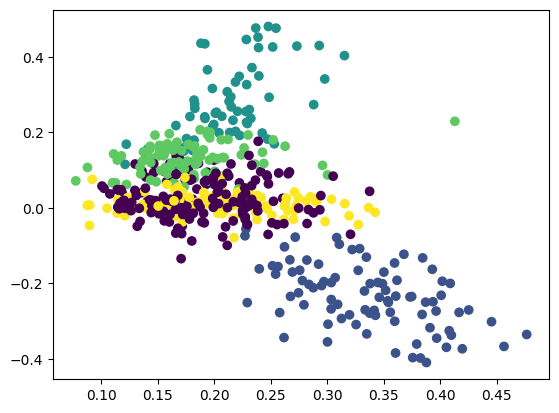

In [37]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [38]:
# Create Clustering for big dataset
kmeans_big_df = KMeans( n_clusters = 5)
kmeans_big_df.fit(big_df_features)
big_df_copy ["cluster"] = kmeans_big_df.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)

new_row = {"Metric":"Silhouette", "Algorithm":"KMeans", "Value":silhouette_avg,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.03301506969164865


In [40]:
# evaluating the ch_score
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"KMeans", "Value":ch_score,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 172.16715625913113


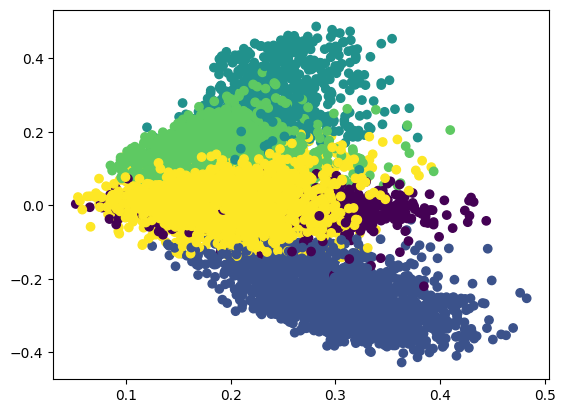

In [41]:
# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()


# AgglomerativeClustering


In [42]:
# import the model
from sklearn.cluster import AgglomerativeClustering


## Small Dataset

In [43]:
# Define the linkage method (ward is a common choice) and distance metric
clustering = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="cosine")
clustering.fit(small_df_features.toarray())

small_df_copy["cluster"] = clustering.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)
new_row = {"Metric":"Silhouette", "Algorithm":"Agglomerative", "Value":silhouette_avg,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.026241820676905527


In [45]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"Agglomerative", "Value":ch_score,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 6.887361632621606


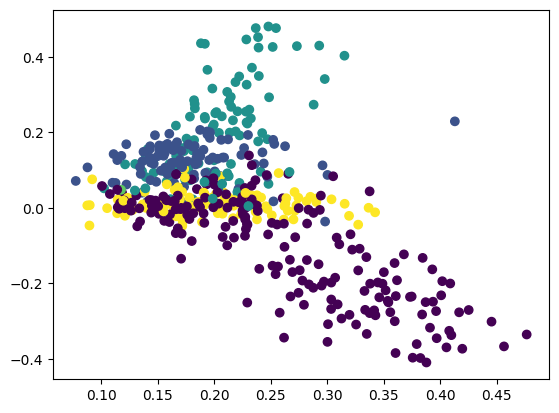

In [46]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [47]:
# Define the linkage method (ward is a common choice) and distance metric
clustering = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="cosine")
clustering.fit(big_df_features.toarray())

big_df_copy["cluster"] = clustering.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)

new_row = {"Metric":"Silhouette", "Algorithm":"Agglomerative", "Value":silhouette_avg,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.0241790620716492


In [49]:
# evaluating the ch_score
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"Agglomerative", "Value":ch_score,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 111.72055465540028


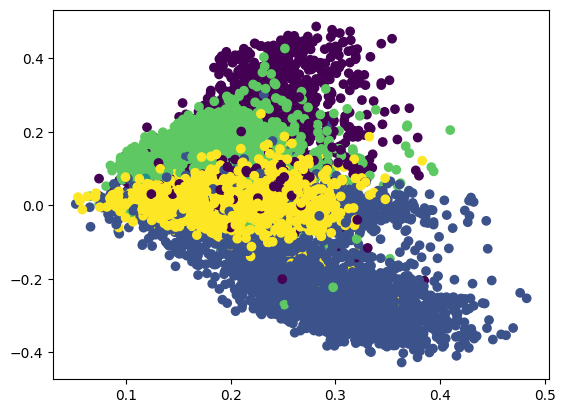

In [50]:
# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()


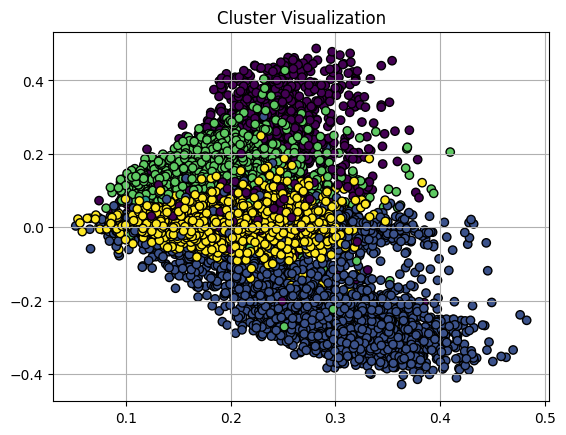

In [51]:
# Define a color list for the clusters
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Adjust the color list as needed

# Scatter plot with custom colors
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"], cmap='viridis', edgecolors='k')  # Using viridis colormap for visual appeal

plt.title('Cluster Visualization')
plt.grid(True)
plt.show()


# DBSCAN

In [52]:
# Import the clustering model
from sklearn.cluster import DBSCAN
import numpy as np

## Small Dataset

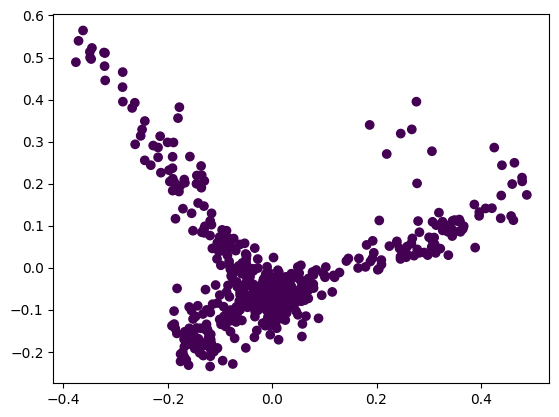

In [53]:
from sklearn.decomposition import PCA

# Define DBSCAN parameters (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.002, min_samples=6)
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=9)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# Perform PCA with desired number of components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(reduced_features)

dbscan.fit(X_reduced)

small_df_copy["cluster"] = dbscan.labels_

# we draw the obtained clusters for small dataset
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=small_df_copy["cluster"])
plt.show()

In [54]:
# # evaluating the silhouette score
# silhouette_avg = silhouette_score(reduced_features, small_df_copy["cluster"])
# print("Silhouette Score:", silhouette_avg)
# new_row = {"Metric":"Silhouette", "Algorithm":"DBSCAN Clustering", "Value":silhouette_avg,"Dataset_Size":1000}
# metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

In [55]:
# # evaluating the ch_score for the small dataset
# # to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
# dense_small_df_features = reduced_features.toarray()

# ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
# print("Calinski-Harabasz Score:", ch_score)
# new_row = {"Metric":"ch_score", "Algorithm":"DBSCAN Clustering", "Value":ch_score,"Dataset_Size":1000}
# metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

## Big Dataset

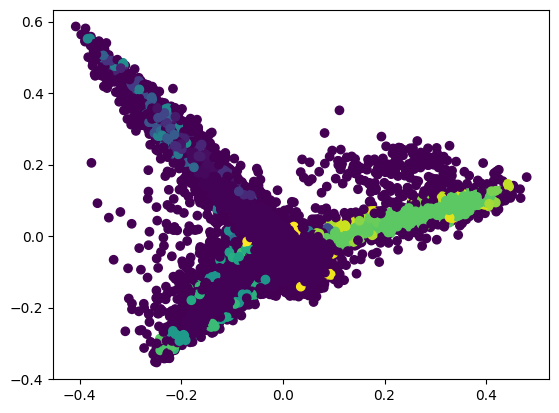

In [56]:
# Define DBSCAN parameters (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.005, min_samples=4)
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=9)


# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# Perform PCA with desired number of components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(reduced_features)
dbscan.fit(X_reduced)

big_df_copy["cluster"] = dbscan.labels_

# we draw the obtained clusters for small dataset
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=big_df_copy["cluster"])
plt.show()

In [57]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(X_reduced, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)

new_row = {"Metric":"Silhouette", "Algorithm":"DBSCAN", "Value":silhouette_avg,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: -0.5525630685698961


In [58]:
# evaluating the ch_score

ch_score = calinski_harabasz_score(X_reduced, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"DBSCAN", "Value":ch_score,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 93.45549529773471


# SpectralClustering

In [59]:
# Import the model
from sklearn.cluster import SpectralClustering

## Small Dataset

In [60]:
# Define the number of clusters
spectral = SpectralClustering(n_clusters=5, random_state=0)  # Set a random state for reproducibility
spectral.fit(small_df_features)

small_df_copy["cluster"] = spectral.labels_


In [61]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(small_df_features, small_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)
new_row = {"Metric":"Silhouette", "Algorithm":"Spectral", "Value":silhouette_avg,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.03114853414471208


In [62]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_small_df_features = small_df_features.toarray()

ch_score = calinski_harabasz_score(dense_small_df_features, small_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"Spectral", "Value":ch_score,"Dataset_Size":1000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 9.559851457318576


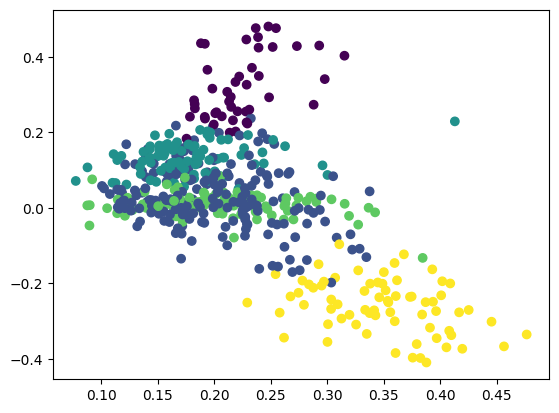

In [63]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(small_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=small_df_copy["cluster"])
plt.show()

## Big Dataset

In [64]:
# Define the number of clusters
spectral = SpectralClustering(n_clusters=5, random_state=0)  # Set a random state for reproducibility
spectral.fit(big_df_features)

big_df_copy["cluster"] = spectral.labels_

In [65]:
# evaluating the silhouette score
silhouette_avg = silhouette_score(big_df_features, big_df_copy["cluster"])
print("Silhouette Score:", silhouette_avg)

new_row = {"Metric":"Silhouette", "Algorithm":"Spectral", "Value":silhouette_avg,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Silhouette Score: 0.030637408779787215


In [66]:
# evaluating the ch_score for the small dataset
# to allow it to be used in the calinski_harabasz_score as it doesn't accept sparse
dense_big_df_features = big_df_features.toarray()

ch_score = calinski_harabasz_score(dense_big_df_features, big_df_copy["cluster"])
print("Calinski-Harabasz Score:", ch_score)
new_row = {"Metric":"ch_score", "Algorithm":"Spectral", "Value":ch_score,"Dataset_Size":10000}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

Calinski-Harabasz Score: 170.46949581521835


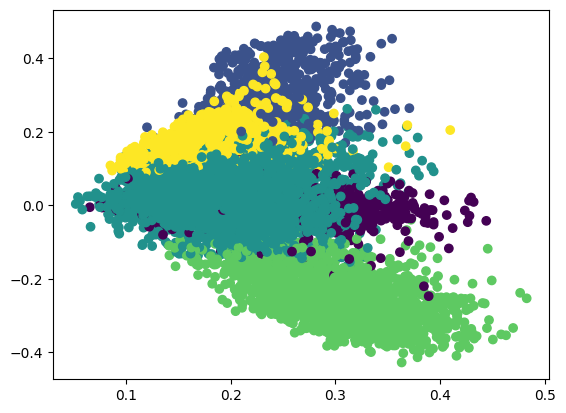

In [67]:
# Create a TruncatedSVD instance with the desired number of components
svd = TruncatedSVD(n_components=4)

# Fit the model on the sparse matrix
reduced_features = svd.fit_transform(big_df_features)

# we draw the obtained clusters for small dataset
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=big_df_copy["cluster"])
plt.show()

# Summary

In [68]:
metrics_df

,Metric,Algorithm,Value,Dataset_Size
0,Silhouette,KMeans,0.034360,1000
1,ch_score,KMeans,9.640374,1000
2,Silhouette,KMeans,0.033015,10000
3,ch_score,KMeans,172.167156,10000
4,Silhouette,Agglomerative,0.026242,1000
5,ch_score,Agglomerative,6.887362,1000
6,Silhouette,Agglomerative,0.024179,10000
7,ch_score,Agglomerative,111.720555,10000
8,Silhouette,DBSCAN,-0.552563,10000
9,ch_score,DBSCAN,93.455495,10000


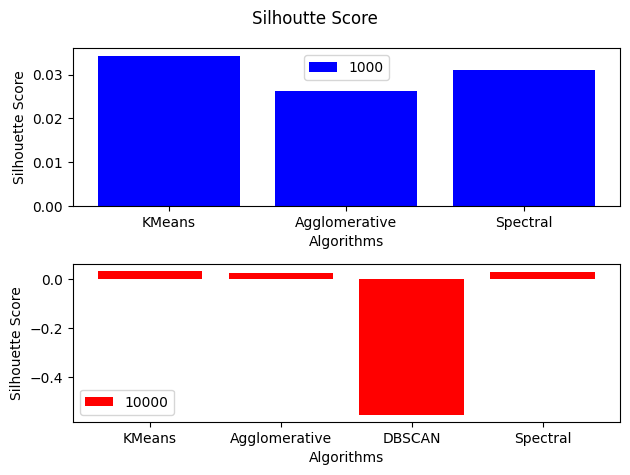

In [69]:
# Creating four graphs
figure, axis = plt.subplots(2, 1)


# plotting for  silhoutte for the two sizes of the dataset

values_small = metrics_df.query("Metric == 'Silhouette' and Dataset_Size == 1000")["Value"]
values_large = metrics_df.query("Metric == 'Silhouette' and Dataset_Size == 10000")["Value"]

algorithms_small = metrics_df.query("Metric == 'Silhouette' and Dataset_Size == 1000")["Algorithm"]
algorithms_large = metrics_df.query("Metric == 'Silhouette' and Dataset_Size == 10000")["Algorithm"]
axis[0].bar(algorithms_small, values_small, color="blue", label = "1000")
axis[1].bar(algorithms_large, values_large, color="red", label = "10000")

# Customize the plot
axis[0].set_xlabel("Algorithms")
axis[0].set_ylabel("Silhouette Score")
axis[0].legend()  # Add legend for dataset sizes

axis[1].set_xlabel("Algorithms")
axis[1].set_ylabel("Silhouette Score")

axis[1].legend()  # Add legend for dataset sizes
figure.suptitle("Silhoutte Score")
plt.tight_layout()
plt.show()

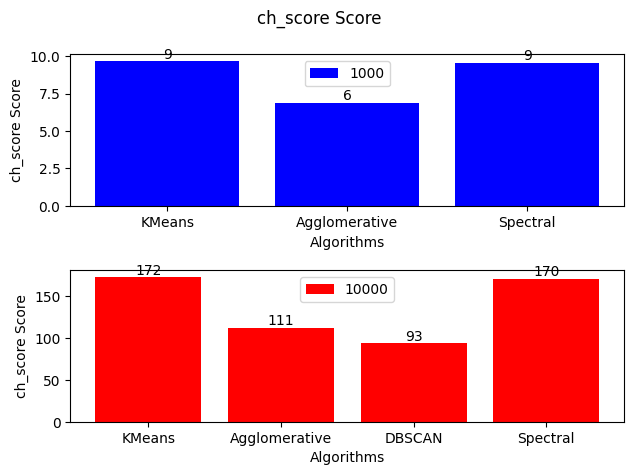

In [80]:
# Creating four graphs
fig, axis = plt.subplots(2, 1)


# plotting for  silhoutte for the two sizes of the dataset

values_small = metrics_df.query("Metric == 'ch_score' and Dataset_Size == 1000")["Value"]
values_large = metrics_df.query("Metric == 'ch_score' and Dataset_Size == 10000")["Value"]

algorithms_small = metrics_df.query("Metric == 'ch_score' and Dataset_Size == 1000")["Algorithm"]
algorithms_large = metrics_df.query("Metric == 'ch_score' and Dataset_Size == 10000")["Algorithm"]
axis[0].bar(algorithms_small, values_small ,color="blue", label = "1000")
for i, value in enumerate(values_small):
    axis[0].text(i, value, str(int(value)), ha='center', va='bottom')

axis[1].bar(algorithms_large, values_large, color="red", label = "10000")
for i, value in enumerate(values_large):
    axis[1].text(i, value, str(int(value)), ha='center', va='bottom')

# Customize the plot
axis[0].set_xlabel("Algorithms")
axis[0].set_ylabel("ch_score Score")
axis[0].legend()  # Add legend for dataset sizes

axis[1].set_xlabel("Algorithms")
axis[1].set_ylabel("ch_score Score")

axis[1].legend()  # Add legend for dataset sizes
fig.suptitle("ch_score Score")
plt.tight_layout()
plt.show()